## **Chocolate Sales DataAnalysis**

**Data Understand and Description**

In [169]:
# Import libiraries
import pandas as pd
import numpy as np

In [170]:
# Load dataset
choco_data = pd.read_csv("/content/Chocolate Sales.csv")

In [171]:
choco_data.head(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
5,Van Tuxwell,India,Smooth Sliky Salty,06/06/2022,"$5,376.00",38
6,Oby Sorrel,UK,99% Dark & Pure,25/01/2022,"$13,685.00",176
7,Gunar Cockshoot,Australia,After Nines,24/03/2022,"$3,080.00",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20/04/2022,"$3,990.00",59
9,Brien Boise,Australia,99% Dark & Pure,04/07/2022,"$2,835.00",102


In [172]:
choco_data.shape

(3282, 6)

In [173]:
choco_data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

### **Data Preprocessing**

In [174]:
# Check Missing Values
choco_data.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [175]:
# Check datatype and information
choco_data.info()
choco_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


,0
Sales Person,object
Country,object
Product,object
Date,object
Amount,object
Boxes Shipped,int64


In [176]:
# convert text to numeric
choco_data["Amount"]=choco_data["Amount"].replace('[/$,]', '', regex=True)
choco_data["Amount"] = pd.to_numeric(choco_data["Amount"],errors = 'coerce')

In [177]:
# Convert text to datatime
choco_data["Date"]=pd.to_datetime(choco_data["Date"], errors='coerce', format='%d/%m/%Y')

In [178]:
# After convertion check Datatypes
print(choco_data.dtypes)

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object


In [179]:
print(choco_data.head(3))

     Sales Person Country              Product       Date  Amount  \
0  Jehu Rudeforth      UK      Mint Chip Choco 2022-01-04  5320.0   
1     Van Tuxwell   India        85% Dark Bars 2022-08-01  7896.0   
2    Gigi Bohling   India  Peanut Butter Cubes 2022-07-07  4501.0   

   Boxes Shipped  
0            180  
1             94  
2             91  


In [180]:
# Basic Statistics(Scale Values)
choco_data.describe()

,Date,Amount,Boxes Shipped
count,3282,3282.000000,3282.000000
mean,2023-05-03 15:09:06.252284928,6030.338775,164.666971
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-07-04 00:00:00,2521.495000,71.000000
50%,2023-05-11 00:00:00,5225.500000,137.000000
75%,2024-03-02 00:00:00,8556.842500,232.000000
max,2024-08-31 00:00:00,26170.950000,778.000000
std,NaN,4393.980200,124.024736


### **Data Visualization**

**Chocolate Sales by Country**

Country
Australia      3646444.35
Canada         3078495.65
India          3343730.83
New Zealand    3043654.04
UK             3365388.90
USA            3313858.09
Name: Amount, dtype: float64


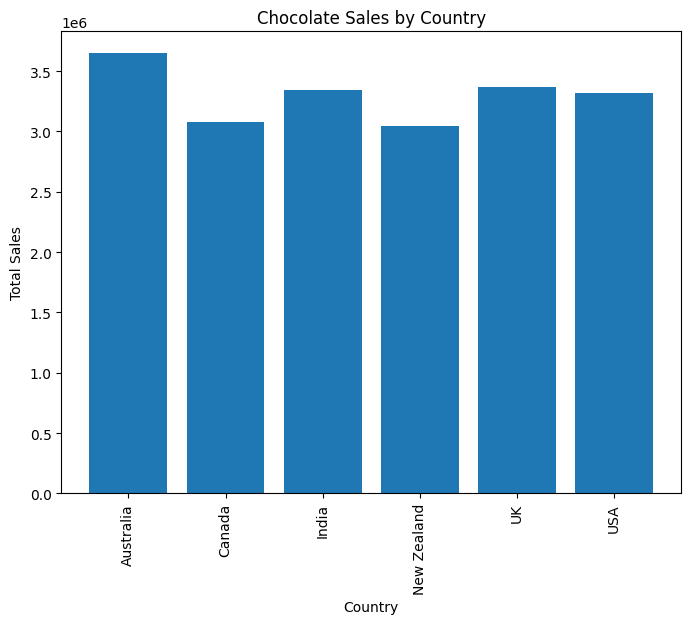

In [181]:
# Find which country has high sales
country_sales = choco_data.groupby("Country")["Amount"].sum()
print(country_sales)

# Which country has highest revenue?
# Is revenue concentrated in 1–2 countries?
# Are some countries underperforming?

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(country_sales.index, country_sales.values)
plt.title("Chocolate Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()


**Chocolate Sales by Product**

                 Product      Amount
19    Smooth Sliky Salty  1120201.09
0         50% Dark Bites  1087659.35
21            White Choc  1054257.00
17   Peanut Butter Cubes  1036591.09
10               Eclairs   996947.96
3        99% Dark & Pure   960033.45
2          85% Dark Bars   955268.24
16   Organic Choco Syrup   945345.73
20   Spicy Special Slims   938131.69
14       Mint Chip Choco   904989.55
5           Almond Choco   890454.65
12    Manuka Honey Choco   885208.03
13             Milk Bars   866273.62
18       Raspberry Choco   845388.41
4            After Nines   837215.67
11      Fruit & Nut Bars   829278.96
15          Orange Choco   824070.85
9          Drinking Coco   822245.57
6    Baker's Choco Chips   799085.67
8   Choco Coated Almonds   773062.91
7   Caramel Stuffed Bars   742516.15
1         70% Dark Bites   677346.22


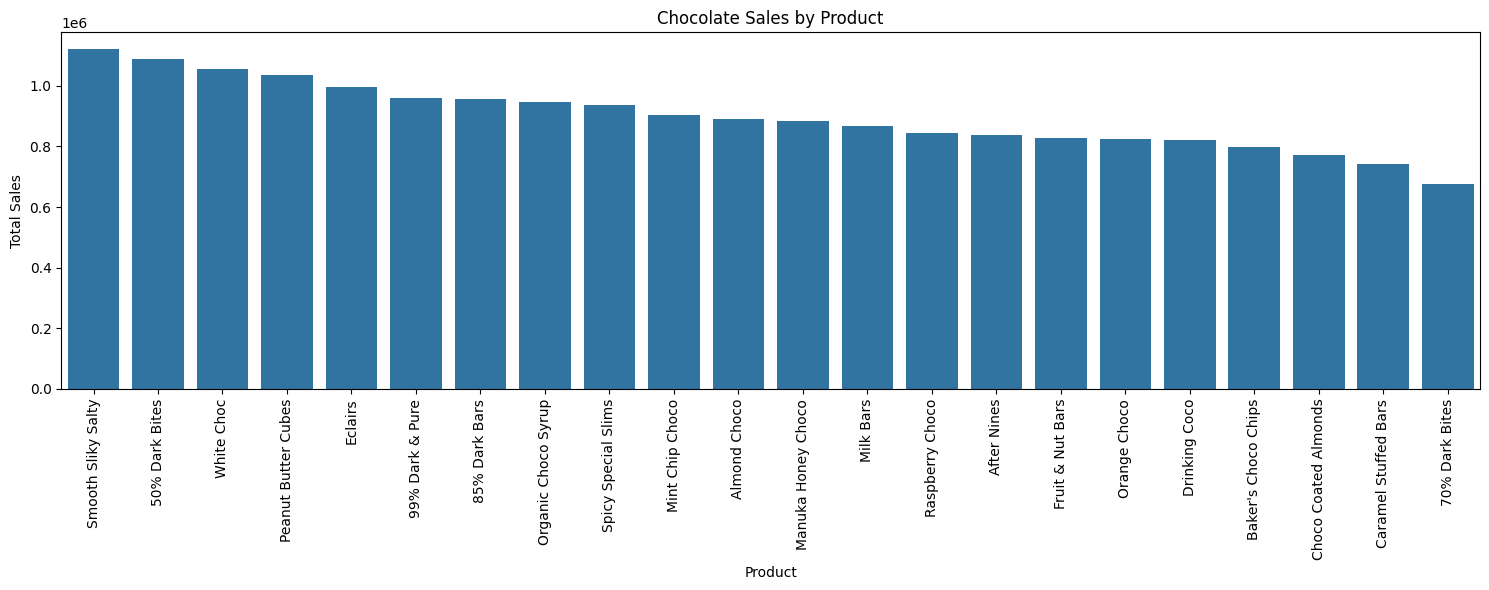

In [182]:
# Find Which product has High sales
# Best-selling product?
# Least-performing product?
# Big gap between products?

product_sales = (choco_data.groupby("Product")["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False))
print(product_sales)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.barplot(x="Product", y="Amount", data=product_sales)
plt.title("Chocolate Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Total Sales by SalesPerson to find Performance**

           Sales Person      Amount
5          Ches Bonnell  1022599.96
20           Oby Sorrel  1017204.12
17      Madelene Upcott  1010028.72
16        Kelci Walkden  1002929.10
3           Brien Boise   997326.48
23          Van Tuxwell   974425.09
7   Dennison Crosswaite   931849.57
2        Beverie Moffet   892421.37
14          Kaine Padly   849062.76
19       Marney O'Breen   836427.63
1          Barr Faughny   830826.91
22      Roddy Speechley   808359.58
10      Gunar Cockshoot   762283.43
9          Gigi Bohling   742296.51
15     Karlen McCaffrey   713832.64
13       Jehu Rudeforth   708505.03
12         Jan Morforth   706585.50
6        Curtice Advani   691797.92
21  Rafaelita Blaksland   668865.45
11         Husein Augar   656149.73
0        Andria Kimpton   648214.81
18       Mallorie Waber   642903.33
4        Camilla Castle   628613.13
8        Dotty Strutley   608101.17
24       Wilone O'Kielt   439961.92
Best Sales Person is:Ches Bonnell


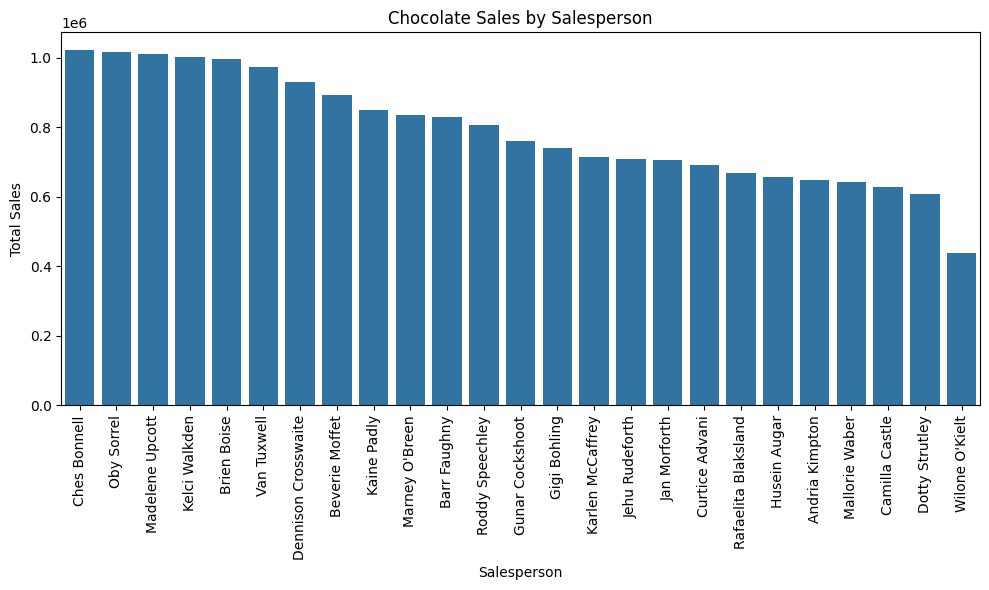

In [183]:
# Top Sales Person
# Top performer?
# Large performance gap?
# Consistency?
sales_person = (choco_data.groupby("Sales Person")["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False))
print(sales_person)

top_sales_person = sales_person.iloc[0]
print(f"Best Sales Person is:{top_sales_person["Sales Person"]}")

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x="Sales Person", y="Amount", data=sales_person)
plt.title("Chocolate Sales by Salesperson")
plt.xlabel("Salesperson")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**Relationship between Boxes Shipped and Sales**

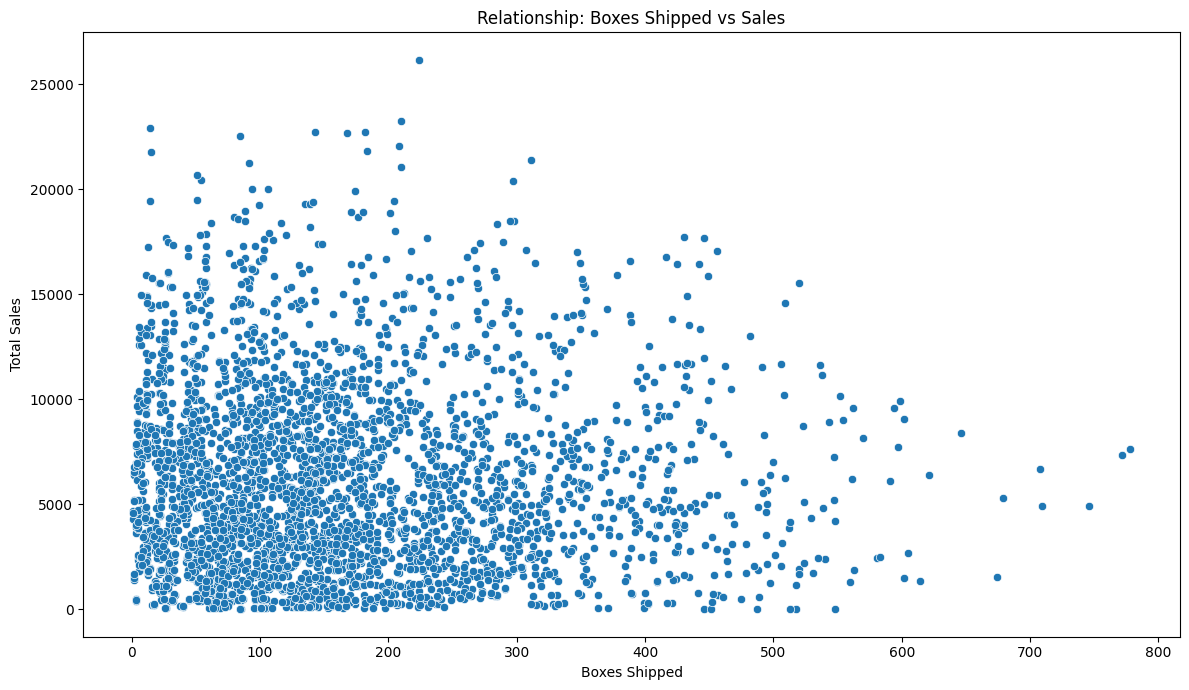

In [184]:
# Relationship between Boxes Shipped vs Sales (Important!)
# Is there a strong positive relationship?
# Are there outliers?
# Does more shipment = more revenue?

plt.figure(figsize=(12,7))
sns.scatterplot(x="Boxes Shipped", y="Amount", data=choco_data)
plt.title("Relationship: Boxes Shipped vs Sales")
plt.xlabel("Boxes Shipped")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

**Find BestSales by Country and Product**

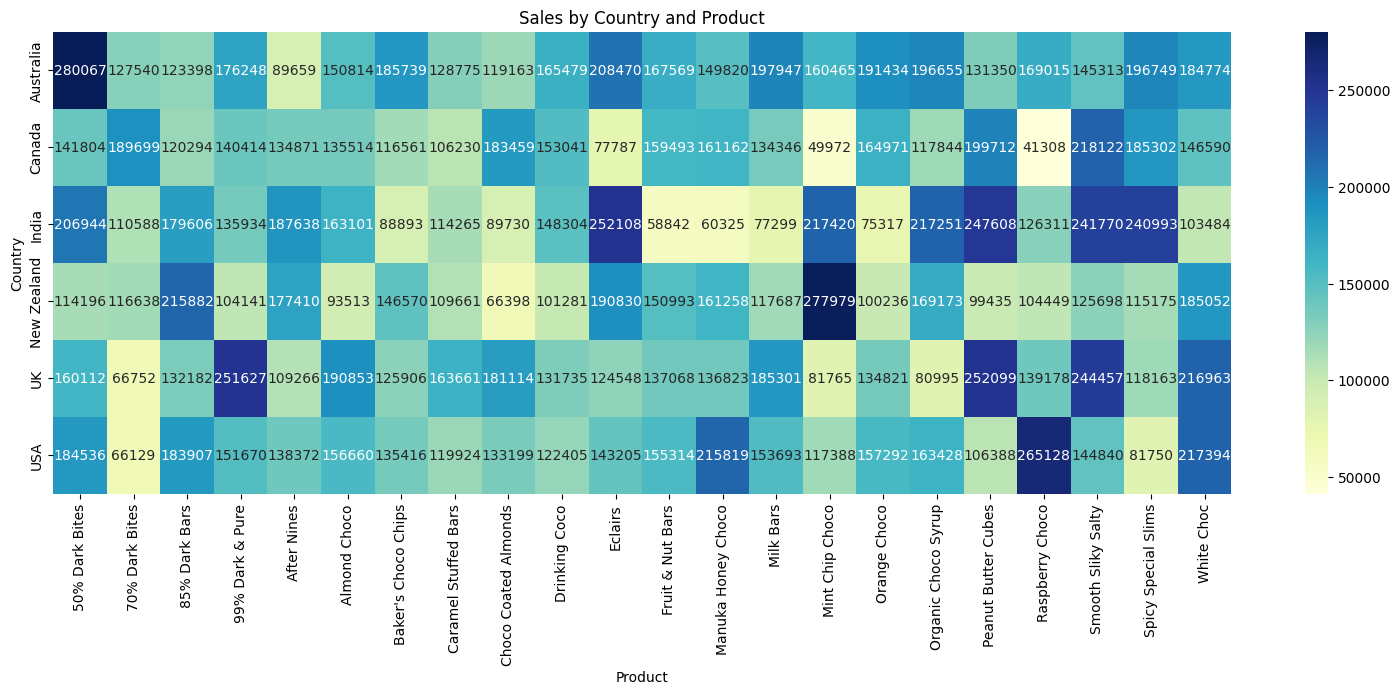

In [185]:
# Heatmap Country VS Product
# Which product performs best in each country?
# Are preferences different across regions?

pivot = choco_data.pivot_table(index="Country", columns="Product", values="Amount", aggfunc="sum")
plt.figure(figsize=(19,6))
sns.heatmap(pivot,annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by Country and Product")
plt.show()


## **Machine Learning**

In [186]:
# We predict Amount using:Product,Sales_Person,Country,Boxes_Shipped
# Step1: Convert Categorical Data
from sklearn.preprocessing import LabelEncoder

product_encoded =  LabelEncoder()
sales_person_encoded = LabelEncoder()
country_encoded = LabelEncoder()

choco_data["Product"] = product_encoded.fit_transform(choco_data["Product"])
choco_data["Sales Person"]=sales_person_encoded.fit_transform(choco_data["Sales Person"])
choco_data["Country"]=country_encoded.fit_transform(choco_data["Country"])

In [187]:
# Step 2: Find Target Variable
X = choco_data[["Country","Product","Sales Person","Boxes Shipped"]]
y = choco_data["Amount"]

In [188]:
# Step 3: Split train and text data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [189]:
# Step 4: Model Selection(Linear Regression)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [190]:
# Step 5: Evaluate model
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))


MAE: 1656.4123515529343
R2 Score: 0.6817558759993125


>The Random Forest model trained to predict chocolate sales demonstrates good predictive performance.
**The Mean Absolute Error (MAE) is ~1,656 units**, meaning that on average, the model’s predicted sales deviate by ~28% from the actual sales (given the mean sales of ~6,030 units).
**The R² score is 0.682**, indicating that the model explains approximately 68% of the variance in sales amounts across products, countries, and sales personnel.

**Feature Importance**

         Feature  Importance
3  Boxes Shipped    0.335927
2   Sales Person    0.252859
1        Product    0.250931
0        Country    0.160283


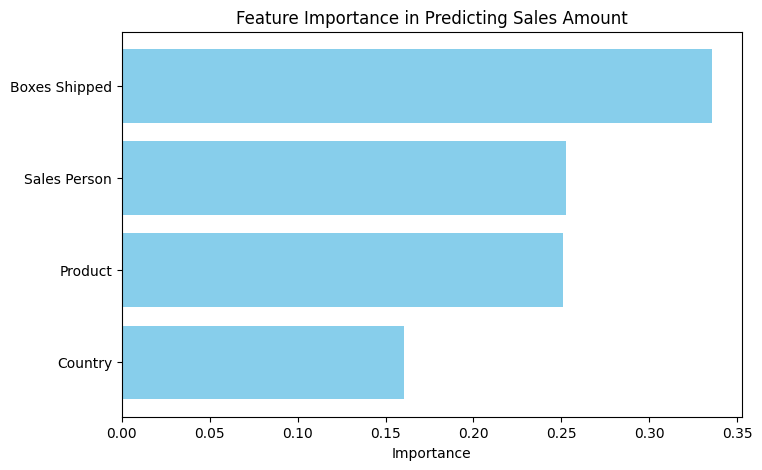

In [191]:
# Get feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance in Predicting Sales Amount")
plt.gca().invert_yaxis()  # largest importance on top
plt.show()


## **Conclusion**


> **Our Random Forest model** shows that Boxes Shipped is the most influential factor on sales (35%), followed by Product (25%) and Sales Person (24%). Country has the least impact (16%). This suggests that sales strategies should prioritize optimizing shipment quantities, focusing on high-performing products, and leveraging strong sales personnel. Country-specific strategies are less critical but may still provide marginal gains.


